Copyright (C) 2024  Adam Jones  All Rights Reserved

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU Affero General Public License as published
by the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU Affero General Public License for more details.

You should have received a copy of the GNU Affero General Public License
along with this program.  If not, see <https://www.gnu.org/licenses/>.

In [1]:
import figure_standard
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import cm, colors
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.transforms import blended_transform_factory
from matplotlib.patches import Patch
import os

In [2]:
n_boot = 10001
figure_standard.standardize_plot_settings()
main_palette = figure_standard.create_main_palette()
blue_cmap = figure_standard.create_blue_cmap()

In [3]:
### a
df = pd.read_excel('../2_intermediate_data/test_transitions.xlsx')
# normalize counts by hr
for key in list(df.keys())[2:]:
    df[key] = (3600/30) * (df[key]/df['epochs'])

data_transition = pd.melt(df, id_vars=[], value_vars=['pred_all', 'pred_w', 'pred_n1', 'pred_n2', 'pred_n3', 'pred_rem', 'targ_all', 'targ_w', 'targ_n1', 'targ_n2', 'targ_n3','targ_rem'])
data_transition['dummy'] = 1
data_transition['target'] = 1

upper_stage = ['Overall', 'Wake', 'N1', 'N2', 'N3', 'REM']

for i, stage in enumerate(['all', 'w', 'n1', 'n2', 'n3', 'rem']):
    data_transition.loc[data_transition.variable == 'pred_'+stage, 'target'] = 0
    data_transition.loc[data_transition.variable == 'pred_'+stage, 'variable'] = upper_stage[i]

    data_transition.loc[data_transition.variable == 'targ_'+stage, 'target'] = 1
    data_transition.loc[data_transition.variable == 'targ_'+stage, 'variable'] = upper_stage[i]


In [4]:
### b and c
# load from file
df_pred = pd.read_excel("../2_intermediate_data/transition_1431_prediction.xlsx",header=None)
# convert to array
confusion = df_pred.to_numpy()
# convert to percent
model_transitions = np.zeros([5,5])
for i in range(5):
    model_transitions[i,:] = confusion[i,:]/confusion.sum(1)[i]
model_transitions = 100*model_transitions

# load from file
df_targ = pd.read_excel("../2_intermediate_data/transition_1431_target.xlsx",header=None)
# convert to array
confusion = df_targ.to_numpy()
# convert to percent
human_transitions = np.zeros([5,5])
for i in range(5):
    human_transitions[i,:] = confusion[i,:]/confusion.sum(1)[i]
human_transitions = 100*human_transitions

/tmp/ipykernel_1273705/3321409691.py:198: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


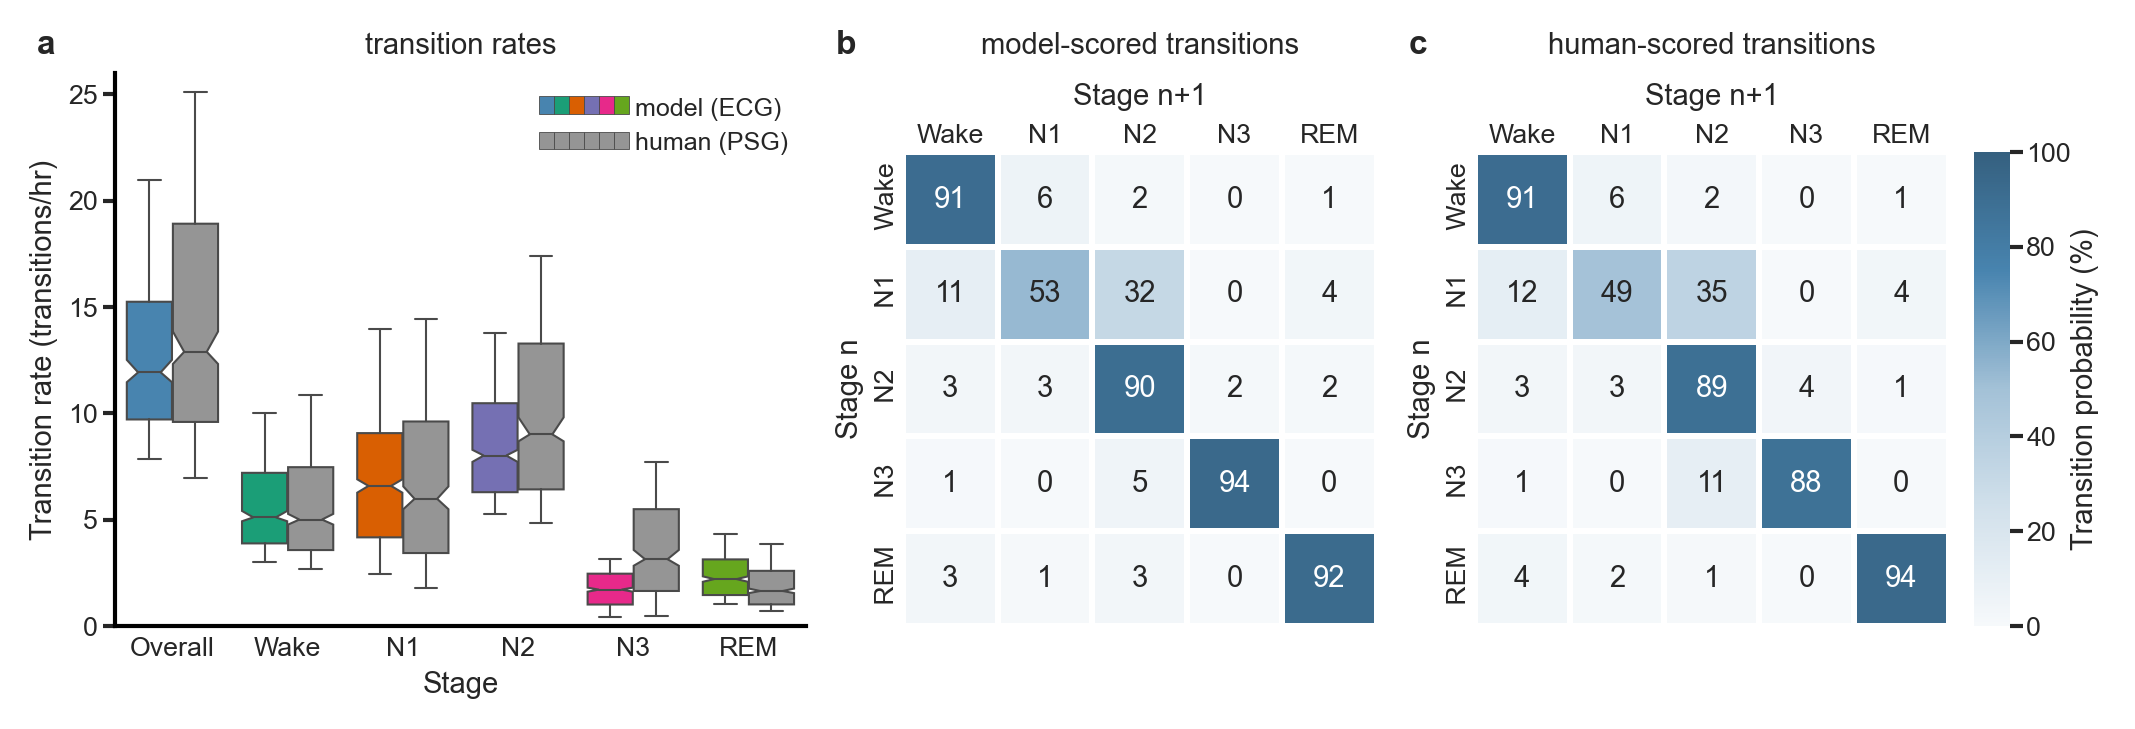

In [5]:
minimal_plot = False
stages = ['Wake','N1','N2','N3','REM']
stages_hypno =['N3','N2','N1','REM','Wake']

other_pad = 4
transition_width = 29
heatwidth = 20
cb_pad = (heatwidth/20) * 1
cb_width = (heatwidth/20) * 1.5
cb_label = (cb_width/1.5) * 4


gs = gridspec.GridSpec(2, 8, width_ratios=[transition_width, other_pad, heatwidth, other_pad, heatwidth, cb_pad, cb_width, cb_label], 
                       height_ratios=[1.5, 9])
                  
ax2 = plt.subplot(gs[0:, 0])
pad_2 = plt.subplot(gs[1, 1])
ax3 = plt.subplot(gs[1, 2])
pad_3 = plt.subplot(gs[1, 3])
ax4 = plt.subplot(gs[1, 4])
cb_pad = plt.subplot(gs[1, 5])
ax_cb = plt.subplot(gs[1, 6])
cb_label = plt.subplot(gs[1, 7])




### a


temp_palette = []
temp_palette += [main_palette[0]]
human_color = sns.color_palette("Greys", 7)[3]
temp_palette += [human_color]

sns.boxplot(
    data=data_transition,
    x="variable",
    y="value",
    hue="target", 
    palette=temp_palette,
    width=0.8,
    whis=[10, 90], showfliers=False, linewidth=0.5,
    notch=True, bootstrap=n_boot,
    saturation=1,
    ax=ax2
)

i = 0
for child in ax2.get_children():
    try:
        if child._label == '':
            facecolor = child._facecolor
            if abs(facecolor[0] - temp_palette[0][0]) < 0.01:
                color_i = i % 6
                if i > 0:
                    child.set_facecolor(main_palette[color_i])
                i += 1
    except:
        pass

ax2.set_ylim([0, 26])
labelpad = 2.5
ax2.set_ylabel('Transition rate (transitions/hr)', fontweight=None, labelpad=labelpad)
ax2.set_xlabel('Stage', fontweight=None, labelpad=labelpad)

sns.despine(ax=ax2, right=True, top=True, bottom=False)
ax2.grid(False)
ax2.tick_params(axis='y', left=True, width=1, length=3, pad=1)
# ax.tick_params(axis='x', width=1, length=0, pad=1)

for tick in ax2.get_xticklabels():
    tick.set_verticalalignment("bottom")



pcolor = '#4a4a4a'
plw = 0.2

pa0 = Patch(facecolor=main_palette[0], edgecolor=pcolor, linewidth=plw)
pa1 = Patch(facecolor=main_palette[1], edgecolor=pcolor, linewidth=plw)
pa2 = Patch(facecolor=main_palette[2], edgecolor=pcolor, linewidth=plw)
pa3 = Patch(facecolor=main_palette[3], edgecolor=pcolor, linewidth=plw)
pa4 = Patch(facecolor=main_palette[4], edgecolor=pcolor, linewidth=plw)
pa5 = Patch(facecolor=main_palette[5], edgecolor=pcolor, linewidth=plw)

pb0 = Patch(facecolor=human_color, edgecolor=pcolor, linewidth=plw)
pb1 = Patch(facecolor=human_color, edgecolor=pcolor, linewidth=plw)
pb2 = Patch(facecolor=human_color, edgecolor=pcolor, linewidth=plw)
pb3 = Patch(facecolor=human_color, edgecolor=pcolor, linewidth=plw)
pb4 = Patch(facecolor=human_color, edgecolor=pcolor, linewidth=plw)
pb5 = Patch(facecolor=human_color, edgecolor=pcolor, linewidth=plw)

ax2.legend(handles = [pa0, pb0, pa1, pb1, pa2, pb2, pa3, pb3, pa4, pb4, pa5, pb5],
                       labels = ['','','', '', '', '', '', '', '', '', '', '                     '],
    title='', 
    loc='upper right',
    alignment='left',
    handletextpad=0.3,
    ncols=6,
    handlelength=0.6,
    columnspacing=-0.3,
    fontsize=6)

ax2.text(0.753, 0.935, 'model (ECG)', transform=ax2.transAxes,
      fontsize=6, va='center', ha='left')
ax2.text(0.753, 0.872, 'human (PSG)', transform=ax2.transAxes,
      fontsize=6, va='center', ha='left')




### b and c

norm = colors.Normalize(0, 100)

sns.heatmap(model_transitions,  annot=True, fmt=".0f", square=True, vmin=0, vmax=100,
            xticklabels=stages, 
            yticklabels=stages,
            cmap=blue_cmap, 
            cbar=False,
            ax=ax3,
            linewidths=1)

sns.heatmap(human_transitions,  annot=True, fmt=".0f", square=True, vmin=0, vmax=100,
            xticklabels=stages, 
            yticklabels=stages,
            cmap=blue_cmap, 
            cbar=False,
            ax=ax4,
            linewidths=1)


for curr_ax in [ax3, ax4]:
      curr_ax.xaxis.set_label_position('top')
      curr_ax.tick_params(labeltop=True, labelbottom=False)
      curr_ax.tick_params(axis='y', width=1, length=0, pad=1)
      curr_ax.tick_params(axis='x', width=1, length=0, pad=1)
      curr_ax.yaxis.set_ticklabels([' '+x for x in stages], fontdict={'verticalalignment': 'center',
                                                'horizontalalignment': 'right'}, rotation=90)
      curr_ax.set_ylabel('Stage n', fontweight=None, labelpad=labelpad)
      curr_ax.set_xlabel('Stage n+1', fontweight=None, labelpad=labelpad+2)


cb_confusion = ax_cb.figure.colorbar(cm.ScalarMappable(norm=norm, cmap=blue_cmap), 
             drawedges=False,
             cax=ax_cb)

cb_confusion.set_label('Transition probability (%)', labelpad=0)
cb_confusion.outline.set_visible(False)
cb_confusion.ax.yaxis.set_tick_params(pad=1, length=3)



if minimal_plot:
      sns.despine(ax=ax3, right=False, top=False, bottom=False, left=False)
      sns.despine(ax=ax4, right=False, top=False, bottom=False, left=False)
      sns.despine(ax=cb_pad, right=False, top=False, bottom=False, left=False)
else:
      sns.despine(ax=cb_label, right=True, top=True, bottom=True, left=True)
      sns.despine(ax=cb_pad, right=True, top=True, bottom=True, left=True)
      sns.despine(ax=pad_2, right=True, top=True, bottom=True, left=True)
      sns.despine(ax=pad_3, right=True, top=True, bottom=True, left=True)

# always keep these hidden
for axes in [cb_pad, cb_label, pad_2, pad_3]:      
      axes.grid(False)
      axes.patch.set_alpha(0)
      axes.set_xticks([])
      axes.set_yticks([])


blendtransform3 = blended_transform_factory(ax3.transAxes, ax2.transAxes)
blendtransform4 = blended_transform_factory(ax4.transAxes, ax2.transAxes)

### panel labels
panel_label_y = 1.05
panel_label_x = -0.6
panel_label_x_noaxislabel = -0.25
panel_fontsize = 8
ax2.text(-0.1, panel_label_y, 'a', transform=ax2.transAxes,
      fontsize=panel_fontsize, fontweight='bold', va='center', ha='center')
ax3.text(panel_label_x/5, panel_label_y, 'b', transform=blendtransform3,
      fontsize=panel_fontsize, fontweight='bold', va='center', ha='center')
ax4.text(panel_label_x/5, panel_label_y, 'c', transform=blendtransform4,
      fontsize=panel_fontsize, fontweight='bold', va='center', ha='center')

panel_title_x = 0.5
title_fontsize = 7
ax2.text(panel_title_x, panel_label_y, 'transition rates', transform=ax2.transAxes,
      fontsize=title_fontsize, fontweight=None, va='center', ha='center')
ax3.text(panel_title_x, panel_label_y, 'model-scored transitions', transform=blendtransform3,
      fontsize=title_fontsize, fontweight=None, va='center', ha='center')
ax4.text(panel_title_x, panel_label_y, 'human-scored transitions', transform=blendtransform4,
      fontsize=title_fontsize, fontweight=None, va='center', ha='center')


plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
figure_standard.scale_figure_by_axes(ax2, 1.8*1.024, 2.25*1.024)

# save the figure
filename = os.path.basename(globals()["__vsc_ipynb_file__"]).replace(".ipynb", "")
figure_standard.save_figure_files(filename)